<a href="https://colab.research.google.com/github/Balajilp/Time_Series_EDA_Forecastings/blob/main/AUTO_ARIMA_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Integrating google drive with colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# importing all the necessary libraries for time series analysis
import matplotlib as mpl
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
def parse(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [4]:
df = pd.read_csv('http://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [5]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [7]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [8]:
df.shape

(49205, 4)

In [9]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC energy Demand')
fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(
                     buttons=list([
                                   dict(count=1, label='1Y', step='year', stepmode='backward'),
                                   dict(count=2, label='3Y', step='year', stepmode='backward'),
                                   dict(count=3, label='5Y', step='year', stepmode='backward'),
                                   dict(step='all')

                     ])
                 ))
fig.show()

In [10]:
ny_df = df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3e60bc750>,
      dtype=object)

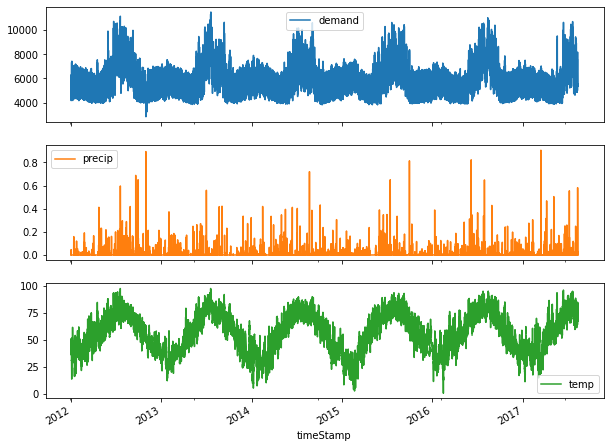

In [11]:
ny_df.plot(subplots=True)

In [12]:
print('Rows : ', df.shape[0])
print('Columns : ', df.shape[1])
print('\nFeatures : \n', df.columns.tolist())
print('\nMissing values : \n', df.isnull().any())
print('\nUnique values : \n', df.nunique())

Rows :  49205
Columns :  4

Features : 
 ['timeStamp', 'demand', 'precip', 'temp']

Missing values : 
 timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

Unique values : 
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


In [13]:
# capturing the missing values
df.query('demand!=demand')

,timeStamp,demand,precip,temp
49124,2012-03-11 02:00:00,NaN,0.0000,37.78
49125,2013-03-10 02:00:00,NaN,0.0000,38.18
49126,2014-03-09 02:00:00,NaN,0.0000,40.86
49127,2015-03-08 02:00:00,NaN,0.0000,36.96
49128,2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [14]:
# filling the missing values
df['demand'] = df['demand'].fillna(method='ffill')
df['temp'] = df['temp'].fillna(method='ffill')

In [15]:
df.isnull().any()

timeStamp    False
demand       False
precip        True
temp         False
dtype: bool

In [16]:
ny_df = df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3e5c7e450>,
      dtype=object)

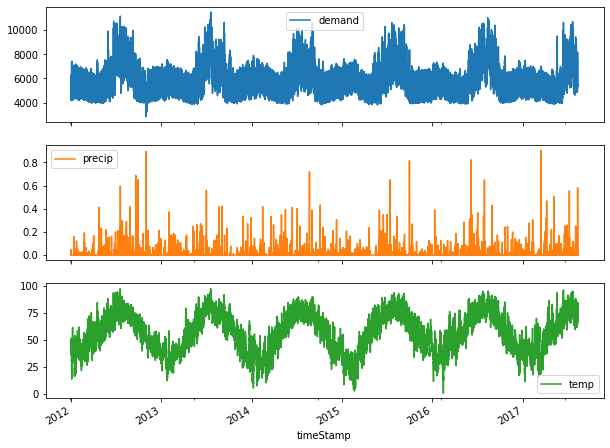

In [17]:
ny_df.plot(subplots=True)

In [18]:
# we have lot of data points it is hard to visualize so we can take data at month level
ny_df.resample('M').mean()

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3e5c64350>,
      dtype=object)

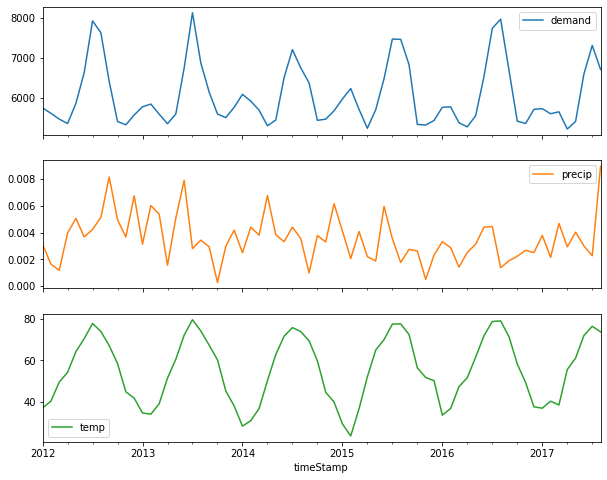

In [19]:
ny_df.resample('M').mean().plot(subplots=True)

In [20]:
# resampling and storing in a new dataframe
ny_df_monthly = ny_df.resample('M').mean()

In [21]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 8.2 MB/s 
     |████████████████████████████████| 9.8 MB 18.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [22]:
import pmdarima as pm

model = pm.auto_arima(ny_df_monthly['demand'], 
                      m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf', error_action='ignore',
                      supress_warnings=True, stepwise=True, 
                      trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.725, Time=1.29 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1022.422, Time=1.64 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=0.72 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1022.606, Time=1.37 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=1008.009, Time=1.35 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=999.313, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1041.793, Time=0.08 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AI

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   68
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                -494.656
Date:                             Sat, 05 Mar 2022   AIC                            999.313
Time:                                     06:42:40   BIC                           1010.410
Sample:                                          0   HQIC                          1003.710
                                              - 68                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2598.1508    618.731      4.199      0.000    1385.459    3810.842
ar.L1         -0.1546      0.193     -0.800      0.424      -0.533       0.224
ma.L1          0.8253      0.120      6.903      0.000       0.591       1.060
ar.S.L12       0.6315      0.089      7.059      0.000       0.456       0.807
sigma2      1.154e+05   2.61e+04      4.417      0.000    6.42e+04    1.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.69   Jarque-Bera (JB):                11.84
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.88
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
ny_df_monthly

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


In [49]:
# splitting the data into train and test
train = ny_df_monthly[(ny_df_monthly.index.get_level_values(0) >= '2012-01-31') & (ny_df_monthly.index.get_level_values(0) <= '2071-04-30')]
test = ny_df_monthly[(ny_df_monthly.index.get_level_values(0) > '2017-04-30')]

In [50]:
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002272,76.380363
2017-08-31,6711.707542,0.008961,73.730258


In [51]:
test.shape 

(4, 3)

In [52]:
model.fit(train['demand'])

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True)

In [53]:
forecast = model.predict(n_periods=4, return_conf_int=True)

In [54]:
forecast

(array([6125.89298032, 5732.22191561, 5633.97622028, 5864.5204845 ]),
 array([[5460.12484368, 6791.66111696],
        [4930.57941764, 6533.86441359],
        [4829.36715649, 6438.58528408],
        [5059.84065678, 6669.20031222]]))

In [55]:
forecast_df = pd.DataFrame(forecast[0], index=test.index, columns=['prediction'])
forecast_df

,prediction
timeStamp,
2017-05-31,6125.892980
2017-06-30,5732.221916
2017-07-31,5633.976220
2017-08-31,5864.520484


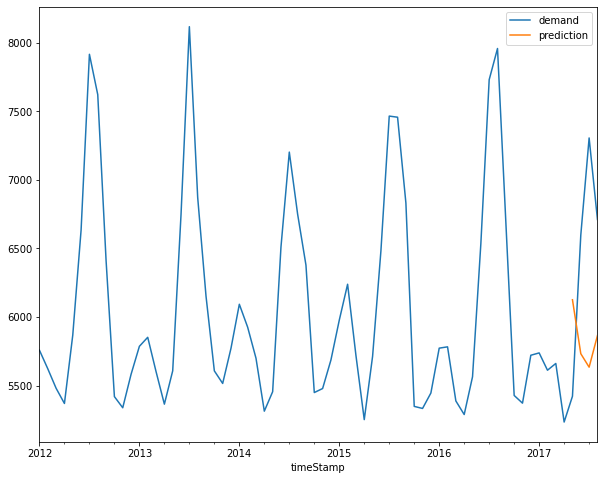

In [56]:
pd.concat([ny_df_monthly['demand'], forecast_df], axis=1).plot()

In [37]:
forecast1 = model.predict(n_periods=8, return_conf_int=True)

In [38]:
forecast1

(array([6125.89298032, 5732.22191561, 5633.97622028, 5864.5204845 ,
        5873.80088118, 5794.28013921, 5825.37928709, 5555.40303963]),
 array([[5460.12484368, 6791.66111696],
        [4930.57941764, 6533.86441359],
        [4829.36715649, 6438.58528408],
        [5059.84065678, 6669.20031222],
        [5069.11936235, 6678.4824    ],
        [4989.59857997, 6598.96169845],
        [5020.69772689, 6630.0608473 ],
        [4750.7214794 , 6360.08459986]]))

In [39]:
forecast_range = pd.date_range(start='2017-05-31', periods=8, freq='M')

In [40]:
forecast_1_df = pd.DataFrame(forecast1[0], index = forecast_range, columns=['Prediction'])

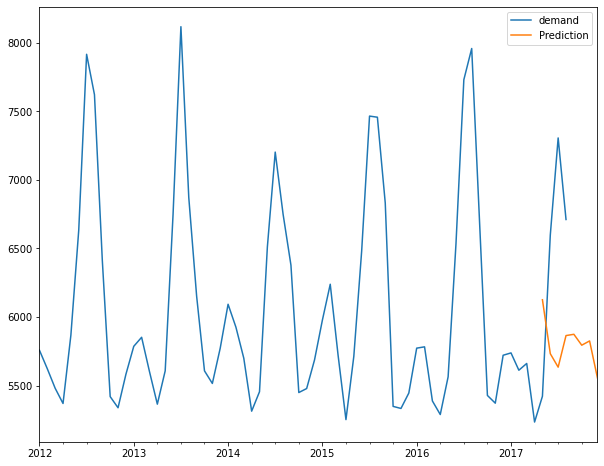

In [42]:
pd.concat([ny_df_monthly['demand'], forecast_1_df], axis=1).plot()

In [57]:
lower = pd.Series(forecast1[1][:, 0], index=forecast_range)
upper = pd.Series(forecast1[1][:, 1], index=forecast_range)

ValueError: ignored

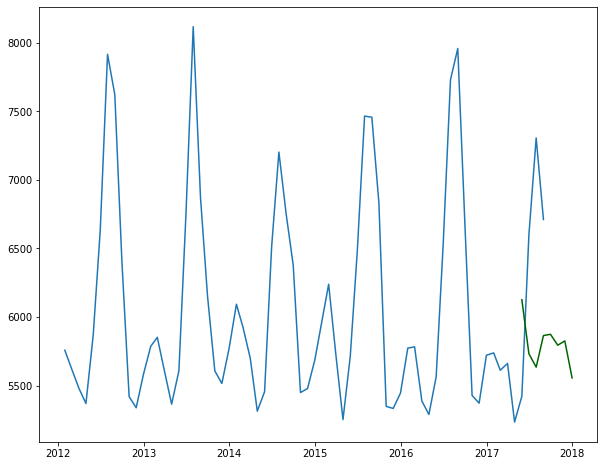

In [61]:
plt.plot(ny_df_monthly['demand'])
plt.plot(forecast_1_df, color='darkgreen')
plt.fill_between(forecast_range,
                 lower, 
                 upper,
                 color='k', 
                 alpha=15)

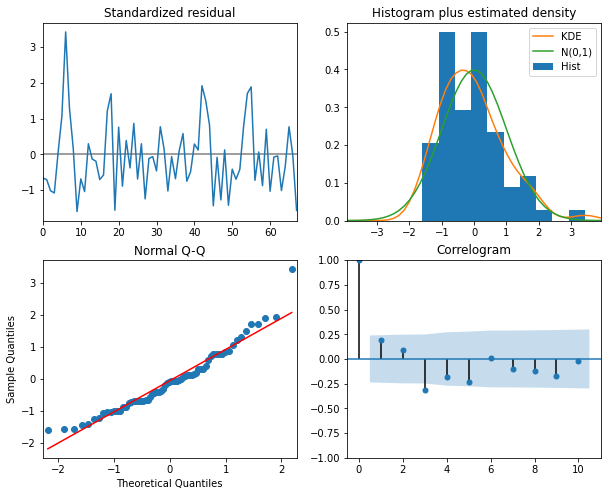

In [62]:
out = model.plot_diagnostics()